In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#importing datasets  
data_set= pd.read_csv('C:\\Users\\rahul\\Downloads\MLP_Database.csv')  
data_set.head()
data_set.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [2]:
data_set.loc[data_set['Loan_Status'] =='Y', 'Loan_approval'] = 1
data_set.loc[data_set['Loan_Status'] =='N', 'Loan_approval'] = 0
data_set.loc[data_set['Education'] =='Graduate', 'Edu'] = 1
data_set.loc[data_set['Education'] =='Not Graduate', 'Edu'] = 0
data_set.loc[data_set['Self_Employed'] =='No', 'Self_Emp'] = 1
data_set.loc[data_set['Self_Employed'] =='Yes', 'Self_Emp'] = 0
data_set.head()
data_set.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_approval,Edu,Self_Emp
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.0,1.0,1.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.0,1.0,1.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1.0,1.0,1.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1.0,1.0,1.0
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N,0.0,1.0,0.0


In [3]:
#Making a new column based on summation of salaries of applicants
data_set['Total Income'] = (data_set['ApplicantIncome'] + data_set['CoapplicantIncome'])
data_set.head()
##Handling the missing data with 0 value
data_set = data_set.fillna(0)

In [4]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [14,15,16]].values  
y= data_set.iloc[:, 13].values  

In [5]:
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0) 

In [6]:
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
y_test

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0.])

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [8]:
y_pred = knn.predict(x_test)

In [9]:
confusion_matrix(y_test, y_pred)

array([[ 5, 38],
       [18, 93]], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6363636363636364

In [11]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.2173913 , 0.70992366]),
 array([0.11627907, 0.83783784]),
 array([0.15151515, 0.76859504]),
 array([ 43, 111], dtype=int64))

In [12]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7099236641221374

In [13]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8378378378378378

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7685950413223139

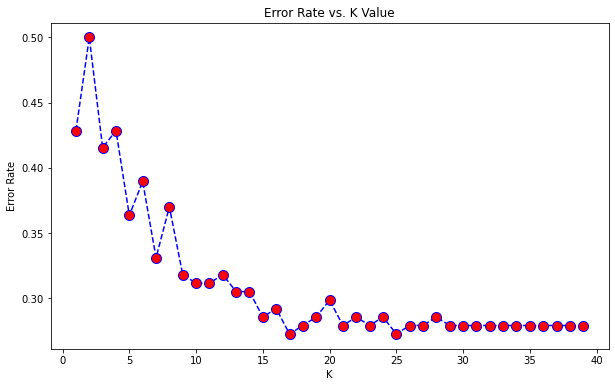

Minimum error:- 0.2727272727272727 at K = 17


In [15]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [16]:
knn = KNeighborsClassifier(n_neighbors=17, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [17]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.7272727272727273